<a href="https://colab.research.google.com/github/Yehhmii/100dayspy4/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 103.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [5]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [6]:
print(df_hh_income.isna().sum())
print(df_pct_poverty.isna().sum())
print(df_pct_completed_hs.isna().sum())
print(df_share_race_city.isna().sum())
print(df_fatalities.isna().sum())

Geographic Area     0
City                0
Median Income      51
dtype: int64
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [7]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_pct_completed_hs.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_fatalities.isna().values.any())

True
False
False
False
True


In [8]:
df_hh_income = df_hh_income.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_share_race_city = df_share_race_city.fillna(0)
df_fatalities = df_fatalities.fillna(0)

In [9]:
print(df_hh_income.duplicated().sum())
print(df_pct_poverty.duplicated().sum())
print(df_pct_completed_hs.duplicated().sum())
print(df_share_race_city.duplicated().sum())
print(df_fatalities.duplicated().sum())

0
0
0
0
0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
# Poverty Rate by State (bar chart)
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
poverty_by_state = (
    df_pct_poverty.groupby('Geographic Area')['poverty_rate']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='poverty_rate')
)


# plot
fig = px.bar(
    poverty_by_state,
    x='Geographic Area', y='poverty_rate',
    title='Poverty Rate by State (2015)',
    labels={'poverty_rate':'% Below Poverty','Geographic Area':'State'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()



In [11]:
# highest & lowest
print("Highest poverty:", poverty_by_state.iloc[0])
print("Lowest poverty:",  poverty_by_state.iloc[-1])

Highest poverty: Geographic Area      MS
poverty_rate      26.88
Name: 0, dtype: object
Lowest poverty: Geographic Area     NJ
poverty_rate      8.19
Name: 50, dtype: object


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
# HS Graduation Rate by State (ascending)
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
hs_by_state = (
    df_pct_completed_hs
    .groupby('Geographic Area')['percent_completed_hs']
    .mean()
    .sort_values()
    .reset_index(name='grad_rate')
)

fig = px.bar(
    hs_by_state,
    x='Geographic Area', y='grad_rate',
    title='High School Graduation Rate by State',
    labels={'grad_rate':'% Completed HS','Geographic Area':'State'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

print("Lowest grad rate:", hs_by_state.iloc[0])
print("Highest grad rate:",hs_by_state.iloc[-1])


Lowest grad rate: Geographic Area      TX
grad_rate         75.69
Name: 0, dtype: object
Highest grad rate: Geographic Area      MA
grad_rate         92.40
Name: 50, dtype: object


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

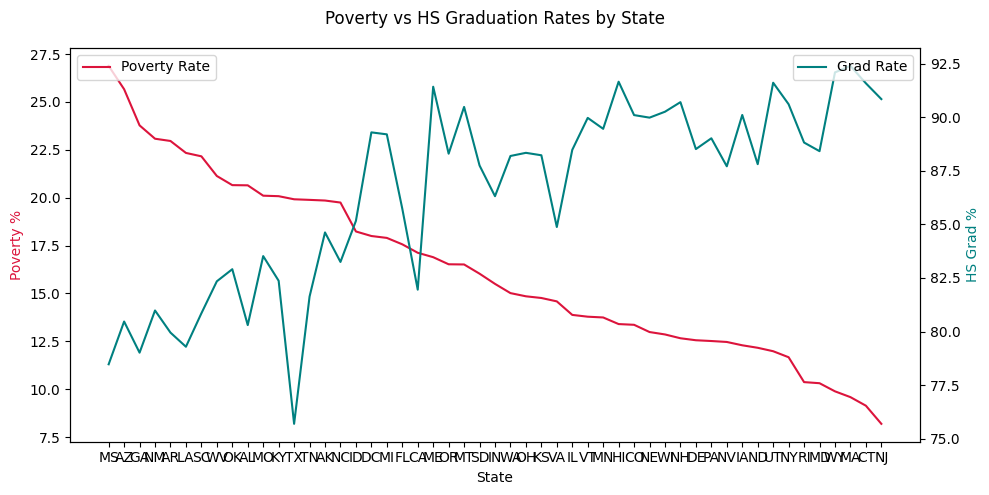

In [13]:
# Poverty vs. Graduation over time (dual‐axis line)
# Merge the two series
df_rel = pd.merge(
    poverty_by_state[['Geographic Area','poverty_rate']],
    hs_by_state[['Geographic Area','grad_rate']],
    on='Geographic Area'
)

# Plot with Matplotlib dual‐axis
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(df_rel['Geographic Area'], df_rel['poverty_rate'], color='crimson', label='Poverty Rate')
ax2.plot(df_rel['Geographic Area'], df_rel['grad_rate'], color='teal',   label='Grad Rate')

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty %', color='crimson')
ax2.set_ylabel('HS Grad %', color='teal')
plt.xticks(rotation=90)
fig.suptitle('Poverty vs HS Graduation Rates by State')
# add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

Text(0.5, 1.02, 'Poverty vs Graduation Scatter/KDE')

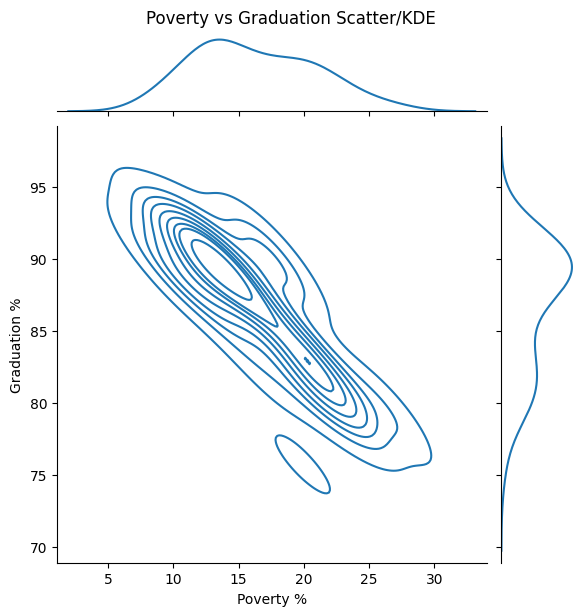

In [17]:
# Seaborn jointplot (KDE + scatter)
sns.jointplot(
    data=df_rel,
    x='poverty_rate', y='grad_rate',
    kind='kde',        # or kind='kde/scatter'
    height=6
).set_axis_labels('Poverty %','Graduation %')
plt.suptitle('Poverty vs Graduation Scatter/KDE', y=1.02)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

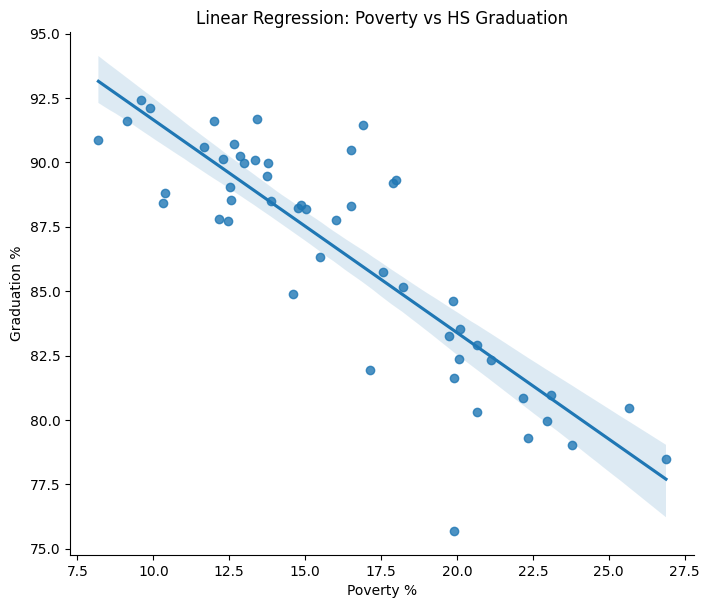

In [18]:
# Seaborn regression plot
sns.lmplot(
    data=df_rel,
    x='poverty_rate', y='grad_rate',
    height=6, aspect=1.2
)
plt.title('Linear Regression: Poverty vs HS Graduation')
plt.xlabel('Poverty %')
plt.ylabel('Graduation %')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [20]:
# Racial makeup by State (stacked bar)
# first average shares by state

race_cols = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
for col in race_cols:
  df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

race_state = (
    df_share_race_city
    .groupby('Geographic area')[race_cols]
    .mean()
    .reset_index()
)

# melt for plotting
race_melt = race_state.melt(
    id_vars='Geographic area',
    value_vars=race_cols,
    var_name='race',
    value_name='share'
)

fig = px.bar(
    race_melt,
    x='Geographic area', y='share', color='race',
    title='Racial Makeup by State (average share)',
    labels={'Geographic area':'State','share':'% of population'}
)
fig.update_layout(barmode='stack', xaxis_tickangle=-45)
fig.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
# Donut chart of Fatalities by Race
race_counts = df_fatalities['race'].value_counts().reset_index()
race_counts.columns = ['race','count']

fig = px.pie(
    race_counts, names='race', values='count',
    title='People Killed by Race',
    hole=0.4
)
fig.update_traces(textinfo='percent+label')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [22]:
# Deaths: Men vs Women
gender_counts = df_fatalities['gender'].value_counts().reset_index()
gender_counts.columns = ['gender','count']

fig = px.bar(
    gender_counts,
    x='gender', y='count',
    title='Police Killings by Gender',
    labels={'count':'Number of Deaths','gender':'Gender'}
)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

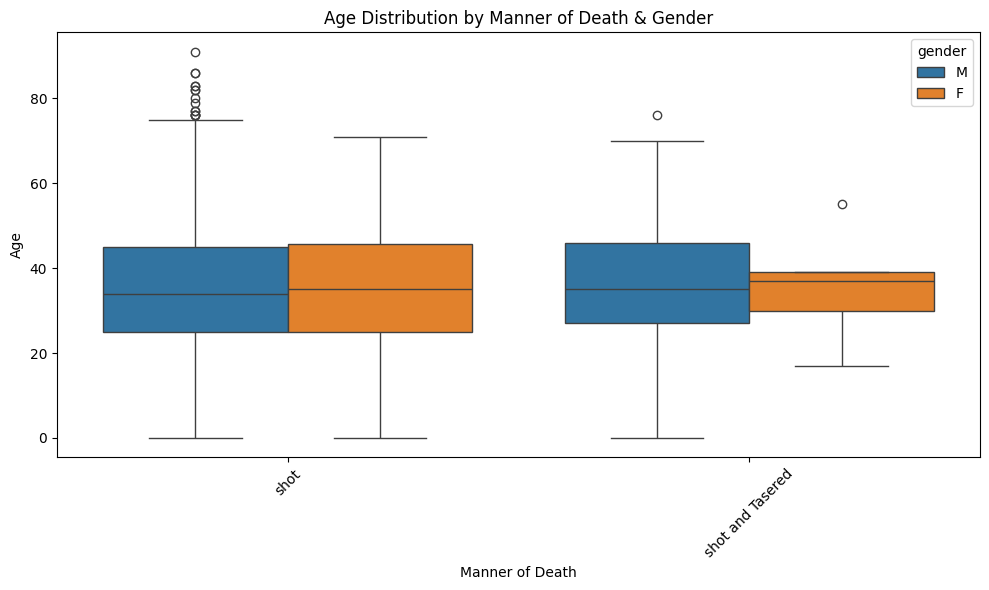

In [23]:
# Box plot: Age by Manner of Death, separated by Gender
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_fatalities,
    x='manner_of_death', y='age', hue='gender'
)
plt.title('Age Distribution by Manner of Death & Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [24]:
# Were People Armed? weapon counts & percentages
armed_counts = df_fatalities['armed'].value_counts(dropna=False).reset_index()
armed_counts.columns = ['armed','count']
armed_counts['pct'] = armed_counts['count'] / armed_counts['count'].sum() * 100

fig = px.bar(
    armed_counts,
    x='armed', y='count',
    title='Weapons Carried by Victims',
    labels={'armed':'Weapon','count':'Number of Deaths'},
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

print(armed_counts[['armed','pct']])

                      armed   pct
0                       gun 55.15
1                     knife 14.71
2                   vehicle  6.98
3                   unarmed  6.75
4              undetermined  4.62
..                      ...   ...
64          air conditioner  0.04
65           pole and knife  0.04
66  baseball bat and bottle  0.04
67                fireworks  0.04
68                      pen  0.04

[69 rows x 2 columns]


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [25]:
# % of victims under 25
under25 = (df_fatalities['age'] < 25).sum()
total   = df_fatalities['age'].notna().sum()
print(f"{under25} out of {total} ({under25/total*100:.1f}%) killed were under 25")

527 out of 2535 (20.8%) killed were under 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

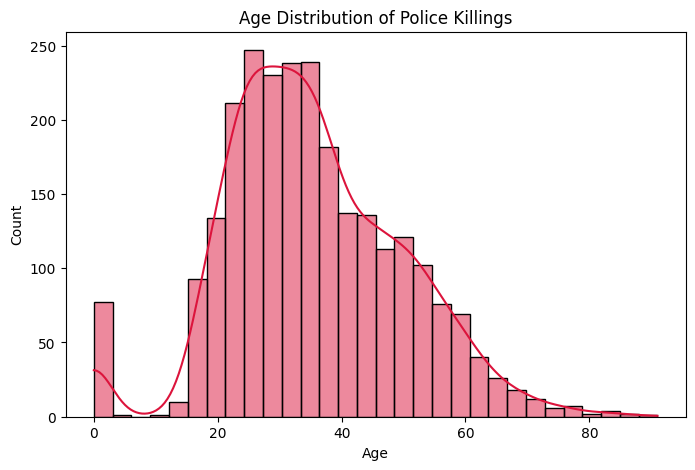

The youngest person killed by police was 0.0 years old
The oldest person killed by police was 91.0 years old


In [27]:
# Histogram + KDE of ages
plt.figure(figsize=(8,5))
sns.histplot(
    data=df_fatalities,
    x='age', kde=True, bins=30, color='crimson'
)
plt.title('Age Distribution of Police Killings')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print(f"The youngest person killed by police was {df_fatalities['age'].min()} years old")
print(f"The oldest person killed by police was {df_fatalities['age'].max()} years old")

Create a seperate KDE plot for each race. Is there a difference between the distributions?

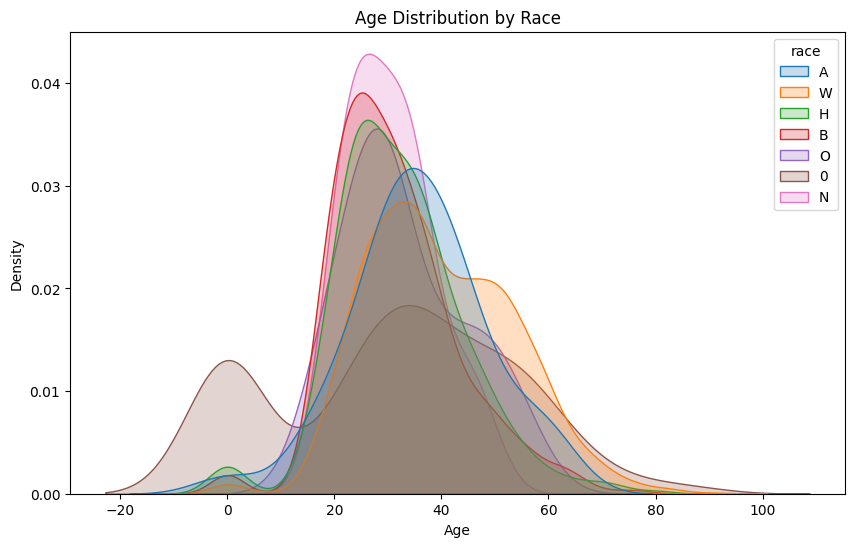

In [28]:
# KDE by Race
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df_fatalities,
    x='age', hue='race',
    common_norm=False, fill=True
)
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [29]:
#  Race of People Killed ===
race_counts = df_fatalities['race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

fig = px.bar(
    race_counts,
    x='Race', y='Count',
    title='Total Number of People Killed by Race',
    labels={'Count':'Number of Deaths'}
)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [30]:
#  Mental Illness and Police Killings ===
mi_counts = df_fatalities['signs_of_mental_illness'].value_counts(dropna=False).reset_index()
mi_counts.columns = ['Mental_Illness', 'Count']
total = mi_counts['Count'].sum()
mi_counts['Pct'] = mi_counts['Count']/total*100

print(mi_counts)

fig = px.pie(
    mi_counts,
    names='Mental_Illness',
    values='Count',
    title='Share of Police Killings with Signs of Mental Illness',
    hole=0.4
)
fig.update_traces(textinfo='percent+label')
fig.show()

   Mental_Illness  Count   Pct
0           False   1902 75.03
1            True    633 24.97


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [31]:
# Top 10 Cities with Most Police Killings ===
city_counts = (
    df_fatalities['city']
    .value_counts()
    .nlargest(10)
    .reset_index()
)
city_counts.columns = ['City','Killings']

fig = px.bar(
    city_counts,
    x='City', y='Killings',
    title='Top 10 Cities by Number of Police Killings'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

print(city_counts)

          City  Killings
0  Los Angeles        39
1      Phoenix        31
2      Houston        27
3      Chicago        25
4    Las Vegas        21
5  San Antonio        20
6     Columbus        19
7        Miami        18
8       Austin        18
9    St. Louis        15


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [32]:
# Rate of Death by Race in Top 10 Cities ===
top10 = city_counts['City'].tolist()
df_top10 = df_fatalities[df_fatalities['city'].isin(top10)]

# count per city & race
race_city = (
    df_top10
    .groupby(['city','race'])
    .size()
    .reset_index(name='Count')
)
# total per city
totals = (
    df_top10
    .groupby('city')
    .size()
    .rename('Total')
    .reset_index()
)
race_city = race_city.merge(totals, on='city')
race_city['Pct'] = race_city['Count']/race_city['Total']*100

fig = px.bar(
    race_city,
    x='city', y='Pct', color='race',
    title='Pct of Killings by Race in Top 10 Cities',
    labels={'Pct':'% of Killings','city':'City'}
)
fig.update_layout(barmode='stack', xaxis_tickangle=-45)
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [33]:
# Choropleth Map of Police Killings by State ===
state_counts = df_fatalities['state'].value_counts().reset_index()
state_counts.columns = ['State','Killings']

fig = px.choropleth(
    state_counts,
    locations='State',
    locationmode='USA-states',
    color='Killings',
    scope='usa',
    title='Police Killings by State'
)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [34]:
#  Number of Police Killings Over Time ===
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')
df_fatalities['Year'] = df_fatalities['date'].dt.year

yearly_killings = (
    df_fatalities
    .dropna(subset=['Year'])
    .groupby('Year')
    .size()
    .reset_index(name='Killings')
)

<ipython-input-34-64530febe8e8>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



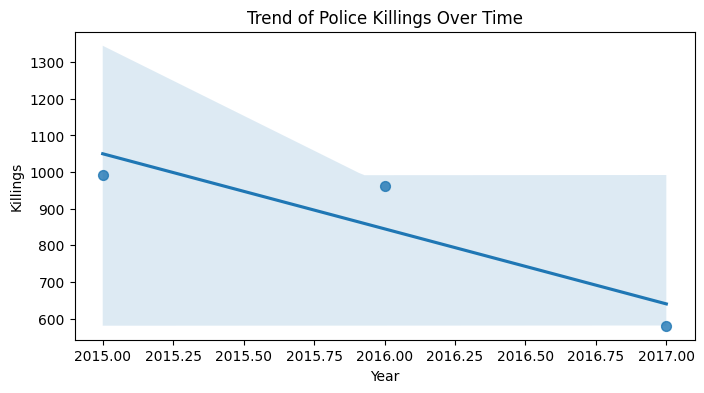

In [36]:
fig = px.line(
    yearly_killings,
    x='Year', y='Killings',
    title='Police Killings per Year'
)
fig.show()

#  trendline with Seaborn
plt.figure(figsize=(8,4))
sns.regplot(
    data=yearly_killings,
    x='Year', y='Killings',
    marker='o', scatter_kws={'s':50}
)
plt.title('Trend of Police Killings Over Time')
plt.show()

In [37]:
df_fatalities.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Year
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,2017
2531,2813,TK TK,2017-07-28,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,2017
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,2017
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,2017
2534,2815,Dwayne Jeune,2017-07-31,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False,2017


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).